<a href="https://colab.research.google.com/github/JungseoChoi/CJSbioinformatics/blob/main/bioinformatics_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파일 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# anaconda 환경 불러오기

In [2]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

Cloning into 'colab-biolab'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 76 (delta 26), reused 59 (delta 15), pack-reused 0
Unpacking objects: 100% (76/76), 318.14 KiB | 3.18 MiB/s, done.
./
./root/
./root/.profile
./root/.vimrc
./root/.bashrc.biolab
./root/.condarc
./root/.bin.priority/
./root/.bin.priority/pip3
./root/.bin.priority/pip2
./root/.bin.priority/pip
./root/.tmux.conf
--2023-06-06 01:03:30--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73134376 (70M) [application/x-sh]
Saving to: ‘miniconda3.sh’

miniconda3.sh       100%[===================>]  69.75M   174MB/s    in 0.4s    

2023-06-06 01:03:30 (174 MB/

In [3]:
!ls -al /content/drive/MyDrive/binfo1-datapack1/

total 7162852
-r-------- 1 root root 1370036258 Apr 27 14:53 CLIP-35L33G.bam
-r-------- 1 root root    3118336 Apr 27 14:53 CLIP-35L33G.bam.bai
-r-------- 1 root root       7113 May 11 11:02 CLIP-let7g.bam
-r-------- 1 root root      14561 May 11 11:03 CLIP-let7g-gene.pileup
-r-------- 1 root root    2685065 May 11 11:02 CLIP-let7g.pileup
-r-------- 1 root root  883334756 Apr 27 14:53 gencode.gtf
-r-------- 1 root root   24065406 Apr 27 15:15 read-counts.txt
-r-------- 1 root root        751 Apr 27 15:15 read-counts.txt.summary
-r-------- 1 root root 1003658801 Apr 27 14:54 RNA-control.bam
-r-------- 1 root root    2276104 Apr 27 14:53 RNA-control.bam.bai
-r-------- 1 root root 1260991122 Apr 27 14:54 RNA-siLin28a.bam
-r-------- 1 root root    2710744 Apr 27 14:54 RNA-siLin28a.bam.bai
-r-------- 1 root root  981684502 Apr 27 14:54 RNA-siLuc.bam
-r-------- 1 root root    2606104 Apr 27 14:54 RNA-siLuc.bam.bai
-r-------- 1 root root  737352902 Apr 27 14:54 RPF-siLin28a.bam
-r-------- 1 r

In [4]:
!conda install -y subread

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0



## Package Plan ##

  environment location: /root/conda

  added / updated specs:
    - subread


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |       2_kmp_llvm           6 KB  conda-forge
    ca-certificates-2023

In [5]:
%cd /content/drive/MyDrive/binfo1-project
!cp ../binfo1-datapack1/*.* .

/content/drive/MyDrive/binfo1-project


In [6]:
!featureCounts -a gencode.gtf -o read-counts.txt *.bam 


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.3

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 7 BAM files                                      ||
||                                                                            ||
||                           CLIP-35L33G.bam                                  ||
||                           CLIP-let7g.bam                                   ||
||                           RNA-control.bam                     

In [ ]:
import pandas as pd
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)
cnts.head()

In [8]:
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam']
cnts['rden_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam'])
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7g.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,0,1,1,1,0,0,4.0,NaN
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,0,inf,NaN
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,0,NaN,NaN


In [ ]:
# 최소 10 이상의 read count를 가진 행들만 선택
filtered_data = cnts[(cnts['CLIP-35L33G.bam'] >= 10) &
                     (cnts['RNA-control.bam'] >= 10) &
                     (cnts['RPF-siLin28a.bam'] >= 10) &
                     (cnts['RNA-siLin28a.bam'] >= 10) &
                     (cnts['RPF-siLuc.bam'] >= 10) &
                     (cnts['RNA-siLuc.bam'] >= 10)]
filtered_data.head()

In [ ]:
cnts['gene_id'] = cnts.index.to_series().str.split('.').str[0]
filtered_data = cnts
filtered_data.head()

In [11]:
# 'gene_id' 열만 선택하여 새로운 데이터프레임 생성
subset = filtered_data[['gene_id']] 
subset.to_csv('output_gene_id.txt', sep='\t', index=False)

# Uniprot에서 Ensemble을 기준으로 matching을 시킨다음 tsv파일로 불러왔음.

In [12]:
# 가져온 tsv파일을 이용해 파일 읽기
GO_term = pd.read_csv('GO_term.tsv', sep='\t', index_col=0)
GO_term

,Entry,Gene Ontology (GO),Entry Name,Gene Names
From,,,,
ENSMUSG00000025903,P97823,cell surface [GO:0009986]; cytoplasm [GO:00057...,LYPA1_MOUSE,Lypla1 Apt1 Pla1a
ENSMUSG00000025903,D3YUG4,hydrolase activity [GO:0016787],D3YUG4_MOUSE,Lypla1
ENSMUSG00000025903,D3Z111,hydrolase activity [GO:0016787],D3Z111_MOUSE,Lypla1
ENSMUSG00000025903,D3Z269,hydrolase activity [GO:0016787],D3Z269_MOUSE,Lypla1
ENSMUSG00000025903,J3QP56,hydrolase activity [GO:0016787],J3QP56_MOUSE,Lypla1
...,...,...,...,...
ENSMUSG00000064345,P03893,mitochondrial inner membrane [GO:0005743]; mit...,NU2M_MOUSE,mt-Nd2 Nd2
ENSMUSG00000064351,P00397,mitochondrial inner membrane [GO:0005743]; mit...,COX1_MOUSE,Mtco1 COI mt-Co1
ENSMUSG00000064363,P03911,mitochondrial inner membrane [GO:0005743]; mit...,NU4M_MOUSE,Mtnd4 mt-Nd4 Nd4


In [13]:
# From column을 gene_id을 추가
GO_term['gene_id'] = GO_term.index.to_series()
GO_term

,Entry,Gene Ontology (GO),Entry Name,Gene Names,gene_id
From,,,,,
ENSMUSG00000025903,P97823,cell surface [GO:0009986]; cytoplasm [GO:00057...,LYPA1_MOUSE,Lypla1 Apt1 Pla1a,ENSMUSG00000025903
ENSMUSG00000025903,D3YUG4,hydrolase activity [GO:0016787],D3YUG4_MOUSE,Lypla1,ENSMUSG00000025903
ENSMUSG00000025903,D3Z111,hydrolase activity [GO:0016787],D3Z111_MOUSE,Lypla1,ENSMUSG00000025903
ENSMUSG00000025903,D3Z269,hydrolase activity [GO:0016787],D3Z269_MOUSE,Lypla1,ENSMUSG00000025903
ENSMUSG00000025903,J3QP56,hydrolase activity [GO:0016787],J3QP56_MOUSE,Lypla1,ENSMUSG00000025903
...,...,...,...,...,...
ENSMUSG00000064345,P03893,mitochondrial inner membrane [GO:0005743]; mit...,NU2M_MOUSE,mt-Nd2 Nd2,ENSMUSG00000064345
ENSMUSG00000064351,P00397,mitochondrial inner membrane [GO:0005743]; mit...,COX1_MOUSE,Mtco1 COI mt-Co1,ENSMUSG00000064351
ENSMUSG00000064363,P03911,mitochondrial inner membrane [GO:0005743]; mit...,NU4M_MOUSE,Mtnd4 mt-Nd4 Nd4,ENSMUSG00000064363


In [14]:
merged_GO = pd.merge(filtered_data, GO_term, on='gene_id')
merged_GO

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7g.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,gene_id,Entry,Gene Ontology (GO),Entry Name,Gene Names
0,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,0,574,1219,1236,33,44,3.562718,0.760459,ENSMUSG00000025903,P97823,cell surface [GO:0009986]; cytoplasm [GO:00057...,LYPA1_MOUSE,Lypla1 Apt1 Pla1a
1,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,0,574,1219,1236,33,44,3.562718,0.760459,ENSMUSG00000025903,D3YUG4,hydrolase activity [GO:0016787],D3YUG4_MOUSE,Lypla1
2,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,0,574,1219,1236,33,44,3.562718,0.760459,ENSMUSG00000025903,D3Z111,hydrolase activity [GO:0016787],D3Z111_MOUSE,Lypla1
3,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,0,574,1219,1236,33,44,3.562718,0.760459,ENSMUSG00000025903,D3Z269,hydrolase activity [GO:0016787],D3Z269_MOUSE,Lypla1
4,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,0,574,1219,1236,33,44,3.562718,0.760459,ENSMUSG00000025903,J3QP56,hydrolase activity [GO:0016787],J3QP56_MOUSE,Lypla1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17910,chrM,3914,4951,+,1038,269,0,1253,3021,3012,2975,2156,0.214685,1.375759,ENSMUSG00000064345,P03893,mitochondrial inner membrane [GO:0005743]; mit...,NU2M_MOUSE,mt-Nd2 Nd2
17911,chrM,5328,6872,+,1545,533,0,16638,50576,39430,21253,17355,0.032035,0.954724,ENSMUSG00000064351,P00397,mitochondrial inner membrane [GO:0005743]; mit...,COX1_MOUSE,Mtco1 COI mt-Co1
17912,chrM,10167,11544,+,1378,373,0,2150,5028,4224,3292,2498,0.173488,1.107123,ENSMUSG00000064363,P03911,mitochondrial inner membrane [GO:0005743]; mit...,NU4M_MOUSE,Mtnd4 mt-Nd4 Nd4
17913,chrM,11742,13565,+,1824,3665,0,5281,15549,17408,5986,5305,0.693997,1.263275,ENSMUSG00000064367,P03921,mitochondrial inner membrane [GO:0005743]; mit...,NU5M_MOUSE,Mtnd5 mt-Nd5 Nd5


In [288]:
#merged_GO에서 원하는 column만 보이게 하고, NaN으로 표시된 GO term 행은 삭제.
subsets_GO = merged_GO[['gene_id', 'clip_enrichment', 'rden_change', 'Gene Ontology (GO)']].set_index('gene_id')
subsets_GO = subsets_GO.dropna(subset=['Gene Ontology (GO)'])
subsets_GO

,clip_enrichment,rden_change,Gene Ontology (GO)
gene_id,,,
ENSMUSG00000025903,3.562718,0.760459,cell surface [GO:0009986]; cytoplasm [GO:00057...
ENSMUSG00000025903,3.562718,0.760459,hydrolase activity [GO:0016787]
ENSMUSG00000025903,3.562718,0.760459,hydrolase activity [GO:0016787]
ENSMUSG00000025903,3.562718,0.760459,hydrolase activity [GO:0016787]
ENSMUSG00000025903,3.562718,0.760459,hydrolase activity [GO:0016787]
...,...,...,...
ENSMUSG00000064345,0.214685,1.375759,mitochondrial inner membrane [GO:0005743]; mit...
ENSMUSG00000064351,0.032035,0.954724,mitochondrial inner membrane [GO:0005743]; mit...
ENSMUSG00000064363,0.173488,1.107123,mitochondrial inner membrane [GO:0005743]; mit...


In [289]:
# Gene ontology (GO)에서 [GO:0009986]을 없애기
import re
pattern = re.compile(r'\s*\[GO:\d+\]\s*' )
subsets_GO['Gene Ontology (GO)'] = subsets_GO['Gene Ontology (GO)'].str.replace(pattern, '')
subsets_GO

,clip_enrichment,rden_change,Gene Ontology (GO)
gene_id,,,
ENSMUSG00000025903,3.562718,0.760459,cell surface; cytoplasm; cytosol; endoplasmic ...
ENSMUSG00000025903,3.562718,0.760459,hydrolase activity
ENSMUSG00000025903,3.562718,0.760459,hydrolase activity
ENSMUSG00000025903,3.562718,0.760459,hydrolase activity
ENSMUSG00000025903,3.562718,0.760459,hydrolase activity
...,...,...,...
ENSMUSG00000064345,0.214685,1.375759,mitochondrial inner membrane; mitochondrial re...
ENSMUSG00000064351,0.032035,0.954724,mitochondrial inner membrane; mitochondrial re...
ENSMUSG00000064363,0.173488,1.107123,mitochondrial inner membrane; mitochondrial re...


In [290]:
# Gene ontology (GO)에서 ';'을 기준으로 새로운 행으로 만들기 ##여기서 너무 많은 행이 생김.단순화 할 수 있는 방법이 없을까?
subsets_GO = subsets_GO.assign(**{'Gene Ontology (GO)': subsets_GO['Gene Ontology (GO)'].str.split(';')}).explode('Gene Ontology (GO)')
subsets_GO['Gene Ontology (GO)'] = subsets_GO['Gene Ontology (GO)'].str.strip() # 앞 뒤로 공백 있는 것 제거.
subsets_GO

,clip_enrichment,rden_change,Gene Ontology (GO)
gene_id,,,
ENSMUSG00000025903,3.562718,0.760459,cell surface
ENSMUSG00000025903,3.562718,0.760459,cytoplasm
ENSMUSG00000025903,3.562718,0.760459,cytosol
ENSMUSG00000025903,3.562718,0.760459,endoplasmic reticulum
ENSMUSG00000025903,3.562718,0.760459,mitochondrion
...,...,...,...
ENSMUSG00000064368,0.843117,1.263780,mitochondrial respiratory chain complex I asse...
ENSMUSG00000064368,0.843117,1.263780,proton motive force-driven mitochondrial ATP s...
ENSMUSG00000064368,0.843117,1.263780,response to cocaine


In [296]:
# 공백 제대로 제거 되었는지 확인
filtered_subsets_GO = subsets_GO.groupby('Gene Ontology (GO)').filter(lambda x: len(x) >= 10)
filtered_subsets_GO

,clip_enrichment,rden_change,Gene Ontology (GO)
gene_id,,,
ENSMUSG00000025903,3.562718,0.760459,cell surface
ENSMUSG00000025903,3.562718,0.760459,cytoplasm
ENSMUSG00000025903,3.562718,0.760459,cytosol
ENSMUSG00000025903,3.562718,0.760459,endoplasmic reticulum
ENSMUSG00000025903,3.562718,0.760459,mitochondrion
...,...,...,...
ENSMUSG00000064368,0.843117,1.263780,mitochondrial respiratory chain complex I asse...
ENSMUSG00000064368,0.843117,1.263780,proton motive force-driven mitochondrial ATP s...
ENSMUSG00000064368,0.843117,1.263780,response to cocaine


In [292]:
#GO_term에 따라 clip-enrichment값과 rden_change값이 Mann-Whitney U test를 통해 제대로 차이가 있는 것인지 확인.
import scipy.stats as stats

filtered_subsets_GO_stat = filtered_subsets_GO.groupby('Gene Ontology (GO)')

# 그룹별로 통계 진행
for Gene_Ontology, group_df in filtered_subsets_GO_stat:
  # 같은 Gene Ontology (GO) 값을 가지는 행만 선택
  same_GO_clip = filtered_subsets_GO[filtered_subsets_GO['Gene Ontology (GO)'] == Gene_Ontology]['clip_enrichment']
  same_GO_rden = filtered_subsets_GO[filtered_subsets_GO['Gene Ontology (GO)'] == Gene_Ontology]['rden_change']
  
  # 다른 Gene Ontology (GO) 값을 가지는 행 선택
  other_GO_clip = filtered_subsets_GO[filtered_subsets_GO['Gene Ontology (GO)'] != Gene_Ontology]['clip_enrichment']
  other_GO_rden = filtered_subsets_GO[filtered_subsets_GO['Gene Ontology (GO)'] != Gene_Ontology]['rden_change']
  
  # Mann-Whitney U 테스트 수행
  statistic_clip, p_value_clip = stats.mannwhitneyu(same_GO_clip, other_GO_clip)
  statistic_rden, p_value_rden = stats.mannwhitneyu(same_GO_rden, other_GO_rden)
    
  # 결과 출력
  print(f'Group: {Gene_Ontology}')
  print('Clip Enrichment')
  print(f'Mann-Whitney U statistic: {statistic_clip}')
  print(f'p-value_clip: {p_value_clip}')
  print()
  print('Ribosome Density Change')
  print(f'Mann-Whitney U statistic: {statistic_rden}')
  print(f'p-value_rden: {p_value_rden}')
  print()

  # filtered_subsets_GO에 열 추가
  filtered_subsets_GO.loc[filtered_subsets_GO['Gene Ontology (GO)'] == Gene_Ontology, 'clip_enrichment_p-value'] = p_value_clip
  filtered_subsets_GO.loc[filtered_subsets_GO['Gene Ontology (GO)'] == Gene_Ontology, 'rden_change_p-value'] = p_value_rden

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.

Ribosome Density Change
Mann-Whitney U statistic: 3683193.5
p-value_rden: 0.0017794039457168682

Group: protein insertion into ER membrane by stop-transfer membrane-anchor sequence
Clip Enrichment
Mann-Whitney U statistic: 929416.0
p-value_clip: 0.001123508319662887

Ribosome Density Change
Mann-Whitney U statistic: 917638.5
p-value_rden: 0.001669127302859375

Group: protein kinase A binding
Clip Enrichment
Mann-Whitney U statistic: 1261592.5
p-value_clip: 0.08036050285506004

Ribosome Density Change
Mann-Whitney U statistic: 1009401.5
p-value_rden: 0.9124075861658885

Group: protein kinase A regulatory subunit binding
Clip Enrichment
Mann-Whitney U statistic: 775983.5
p-value_clip: 0.23161200398063697

Ribosome Density Change
Mann-Whitney U statistic: 644150.5
p-value_rden: 0.9790263829636952

Group: protein kinase B binding
Clip Enrichment
Mann-Whitney U statistic: 820840.0
p-value_clip: 0.7372490684747879

Ribosome Density Change
Mann-Whitney U s

In [2]:
filtered_subsets_GO

NameError: ignored

In [3]:
# fdr 구하기
from statsmodels.stats import multitest

# clip_enrichment_p-value,rden_change_p-value 값들의 배열
clip_p_values = filtered_subsets_GO['clip_enrichment_p-value'].values
rden_p_values = filtered_subsets_GO['rden_change_p-value'].values

# clip_enrichment_p-value, rden_change_p-value에 대한 FDR 계산
reject_clip, fdr_corrected_p_values_clip, _, _ = multitest.multipletests(clip_p_values, method='fdr_bh')
reject_rden, fdr_corrected_p_values_rden, _, _ = multitest.multipletests(rden_p_values, method='fdr_bh')

# 조정된 p-value를 filtered_subsets_GO에 추가
filtered_subsets_GO['clip_enrichment_fdr'] = fdr_corrected_p_values_clip
filtered_subsets_GO['rden_change_fdr'] = fdr_corrected_p_values_rden

filtered_subsets_GO

NameError: ignored

In [217]:
GO_heatmap = pd.DataFrame()
GO_heatmap['Gene Ontology (GO)'] = filtered_subsets_GO.groupby('Gene Ontology (GO)')['Gene Ontology (GO)'].first().index
GO_heatmap['clip_enrichment_mean'] = filtered_subsets_GO.groupby('Gene Ontology (GO)')['clip_enrichment'].mean().values
GO_heatmap['rden_change_mean'] = filtered_subsets_GO.groupby('Gene Ontology (GO)')['rden_change'].mean().values
GO_heatmap['clip_enrichment_fdr_mean'] = filtered_subsets_GO.groupby('Gene Ontology (GO)')['clip_enrichment_fdr'].mean().values
GO_heatmap['rden_change_fdr_mean'] = filtered_subsets_GO.groupby('Gene Ontology (GO)')['rden_change_fdr'].mean().values
GO_heatmap['GO_count'] = filtered_subsets_GO.groupby('Gene Ontology (GO)').size().values
GO_heatmap

,Gene Ontology (GO),clip_enrichment_mean,rden_change_mean,clip_enrichment_fdr_mean,rden_change_fdr_mean,GO_count
0,'de novo' pyrimidine nucleobase biosynthetic ...,0.880241,0.402783,0.002700,0.032536,11
1,1-phosphatidylinositol binding,2.218695,0.516430,0.400433,0.895652,11
2,14-3-3 protein binding,1.558546,0.475321,0.130102,0.115374,24
3,"2 iron, 2 sulfur cluster binding",1.707135,0.724828,0.415980,0.092079,10
4,2-oxoglutarate-dependent dioxygenase activity,1.764799,0.464359,0.520864,0.217476,13
...,...,...,...,...,...,...
2390,signal transduction,2.066612,0.474866,0.903501,0.054058,35
2391,spliceosomal complex,3.274485,0.488004,0.280683,0.178015,13
2392,ubiquitin protein ligase activity,2.933584,0.514321,0.344685,0.433480,26
2393,ubiquitin-protein transferase activity,1.629920,0.642201,0.489604,0.925486,12


In [218]:
#GO_heatmap의 clip_enrichment_fdr이 0.05미만인 것들만 추리기
GO_heatmap_filtered = GO_heatmap[GO_heatmap['clip_enrichment_fdr_mean'] <= 0.1]
GO_heatmap_filtered

,Gene Ontology (GO),clip_enrichment_mean,rden_change_mean,clip_enrichment_fdr_mean,rden_change_fdr_mean,GO_count
0,'de novo' pyrimidine nucleobase biosynthetic ...,0.880241,0.402783,2.699887e-03,3.253642e-02,11
8,"4 iron, 4 sulfur cluster binding",1.471907,0.438418,4.113113e-02,1.210912e-02,25
15,ATP hydrolysis activity,2.987592,0.546554,6.466274e-03,7.943074e-03,272
17,ATP-dependent DNA damage sensor activity,1.399872,0.525155,7.854925e-02,4.190466e-01,20
18,ATP-dependent FeS chaperone activity,0.443154,0.488725,7.630066e-07,6.086583e-01,12
...,...,...,...,...,...,...
2384,protein-arginine N-methyltransferase activity,0.555100,0.353944,5.515959e-06,5.513350e-04,12
2387,ribonucleoprotein complex,1.230464,0.565512,8.597576e-03,6.542284e-01,18
2388,sarcoplasmic reticulum membrane,8.957487,0.984454,2.456192e-08,6.237918e-08,18
2389,signal peptidase complex,5.513062,0.855017,1.048719e-05,6.797431e-05,12


In [219]:
# GO_count의 수가 너무 많은데, 이게 정상적인 숫자인지..? 맞음
GO_heatmap_sorted = GO_heatmap_filtered.sort_values(by='GO_count', ascending=False)
GO_heatmap_sorted

,Gene Ontology (GO),clip_enrichment_mean,rden_change_mean,clip_enrichment_fdr_mean,rden_change_fdr_mean,GO_count
1278,nucleus,2.269098,0.523055,8.883196e-09,2.324950e-24,3157
2330,cytoplasm,2.162299,0.541000,7.869189e-11,1.496228e-07,2276
1267,nucleoplasm,2.223938,0.510770,2.450239e-06,2.324950e-24,1748
541,cytosol,2.069363,0.519553,1.135641e-09,3.728391e-14,1624
526,cytoplasm,2.266203,0.543745,7.370591e-04,2.729992e-06,1558
...,...,...,...,...,...,...
1649,presynaptic active zone membrane,4.941815,0.684144,6.033200e-02,1.202649e-01,10
2194,triglyceride biosynthetic process,4.170487,0.724584,9.461120e-02,9.149766e-02,10
716,glutamine metabolic process,1.193636,0.347845,7.288833e-02,1.752777e-03,10
106,Golgi-associated vesicle,4.378376,0.797498,7.792527e-02,1.917138e-02,10


In [192]:
# Gene Ontology (GO) 값이 같은 행들을 그룹화하고 그룹화한 행의 개수, clip_enrichment와 rden_change의 평균값 계산
GO_heatmap_ = filtered_subsets_GO.groupby(
    'Gene Ontology (GO)').agg( { 'clip_enrichment': 'mean', 'rden_change': 'mean', 'clip_enrichment_p-value': 'mean', 
                                'rden_change_p-value': 'mean', 'clip_enrichment_fdr': 'mean', 'rden_change_fdr': 'mean'}).reset_index()
# column이름 새로 넣기
GO_heatmap_ = GO_heatmap.rename(columns={'clip_enrichment': 'clip_enrichment_mean'})
GO_heatmap_ = GO_heatmap.rename(columns={'rden_change': 'rden_change_mean'})

GO_heatmap_['GO_count'] = filtered_subsets_GO.groupby('Gene Ontology (GO)').size().values
GO_heatmap_ = GO_heatmap.set_index('Gene Ontology (GO)')
GO_heatmap_

,clip_enrichment_mean,rden_change_mean,clip_enrichment_fdr_mean,rden_change_fdr_mean,GO_count
Gene Ontology (GO),,,,,
'de novo' pyrimidine nucleobase biosynthetic process,0.880241,0.402783,0.002700,0.032536,11
1-phosphatidylinositol binding,2.218695,0.516430,0.400433,0.895652,11
14-3-3 protein binding,1.558546,0.475321,0.130102,0.115374,24
"2 iron, 2 sulfur cluster binding",1.707135,0.724828,0.415980,0.092079,10
2-oxoglutarate-dependent dioxygenase activity,1.764799,0.464359,0.520864,0.217476,13
...,...,...,...,...,...
signal transduction,2.066612,0.474866,0.903501,0.054058,35
spliceosomal complex,3.274485,0.488004,0.280683,0.178015,13
ubiquitin protein ligase activity,2.933584,0.514321,0.344685,0.433480,26


In [179]:
#GO_heatmap의 clip_enrichment_fdr이 0.05미만인 것들만 추리기
GO_heatmap_filtered = GO_heatmap[GO_heatmap['clip_enrichment_fdr'] <= 0.1]
GO_heatmap_filtered

,Gene Ontology (GO),clip_enrichment,rden_change,clip_enrichment_p-value,rden_change_p-value,clip_enrichment_fdr,rden_change_fdr
0,'de novo' pyrimidine nucleobase biosynthetic ...,0.880241,0.402783,5.887975e-04,1.633812e-02,2.699887e-03,3.253642e-02
8,"4 iron, 4 sulfur cluster binding",1.471907,0.438418,1.321935e-02,5.388884e-03,4.113113e-02,1.210912e-02
15,ATP hydrolysis activity,2.987592,0.546554,1.585070e-03,3.315372e-03,6.466274e-03,7.943074e-03
17,ATP-dependent DNA damage sensor activity,1.399872,0.525155,2.899554e-02,3.175847e-01,7.854925e-02,4.190466e-01
18,ATP-dependent FeS chaperone activity,0.443154,0.488725,9.568659e-08,5.015385e-01,7.630066e-07,6.086583e-01
...,...,...,...,...,...,...,...
2384,protein-arginine N-methyltransferase activity,0.555100,0.353944,8.031245e-07,1.919693e-04,5.515959e-06,5.513350e-04
2387,ribonucleoprotein complex,1.230464,0.565512,2.194400e-03,5.468555e-01,8.597576e-03,6.542284e-01
2388,sarcoplasmic reticulum membrane,8.957487,0.984454,3.017842e-09,1.159988e-08,2.456192e-08,6.237918e-08
2389,signal peptidase complex,5.513062,0.855017,1.533375e-06,2.056968e-05,1.048719e-05,6.797431e-05


In [180]:
# GO_count의 수가 너무 많은데, 이게 정상적인 숫자인지..? 맞음
GO_heatmap_sorted = GO_heatmap_filtered.sort_values(by='rden_change_fdr', ascending=True)
GO_heatmap_sorted

,Gene Ontology (GO),clip_enrichment,rden_change,clip_enrichment_p-value,rden_change_p-value,clip_enrichment_fdr,rden_change_fdr
2359,membrane,3.509292,0.914389,2.328444e-55,0.000000e+00,1.762211e-53,0.000000e+00
2341,endoplasmic reticulum membrane,4.223334,0.914547,3.610366e-23,3.426518e-67,1.250857e-21,2.216226e-65
934,membrane,3.442630,0.746717,2.415343e-24,1.160433e-62,9.734834e-23,4.891141e-61
610,endoplasmic reticulum membrane,4.155202,0.821850,2.022713e-26,9.069040e-61,1.222390e-24,3.351556e-59
102,Golgi membrane,3.787469,0.844243,1.825870e-20,5.892436e-44,5.852899e-19,2.004772e-42
...,...,...,...,...,...,...,...
201,TORC1 complex,0.754332,0.520338,1.085729e-04,9.361575e-01,6.204440e-04,9.522778e-01
679,fatty-acyl-CoA binding,3.931362,0.601322,4.256070e-03,9.569286e-01,1.548026e-02,9.656292e-01
1466,positive regulation of cytokine production,1.699072,0.598003,1.431451e-02,9.619028e-01,4.375019e-02,9.697798e-01
179,SLIK (SAGA-like) complex,1.071735,0.532639,1.961835e-03,9.696364e-01,7.740959e-03,9.758855e-01


각 GO term에서 해당하는 CLIP_Enrichment, rden_change에서의 값이 GO term에 해당하지 않는 값들과 비교했을 때 유의미한 차이가 있는지 확인하는게 Mann-Whitney U test임. 그래서 이걸 먼저 해서, 각 p-value를 구한 다음, 거기서 fdr을 구해서 그 값들에 대해서 heatmap dot plot을 그리면 됨.
(교수님이 phythonpy에 굉장히 편리한 Mann-Whitney U test가 있다고 함)

추가적으로 dot이 많이 나오는데, 여기서 10개 이상으로 제한을 두거나, 25 이상을 제한을 두거나 해서 그림을 그리면 됨.
그 후 fdr값을 기준으로 진하기를 표시하고 상위13개 GO_count 값만 표현하면괜찮을 것 같음..

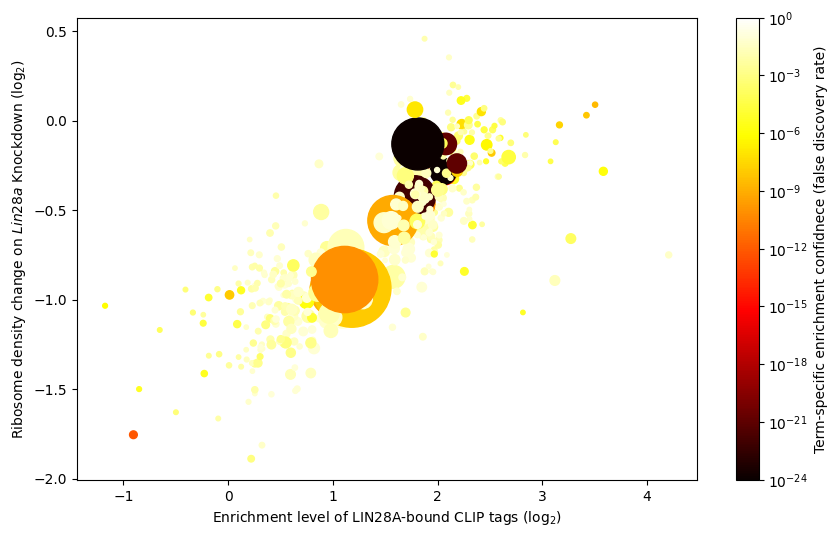

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm 
import seaborn as sns

# 데이터프레임에서 필요한 열 선택
x = np.log2(GO_heatmap_filtered['clip_enrichment_mean'])
y = np.log2(GO_heatmap_filtered['rden_change_mean'])
size = GO_heatmap_filtered['GO_count']
color = GO_heatmap_filtered['clip_enrichment_fdr']


# 그래프 그리기
plt.figure(figsize=(10, 6))
scatter_plot = plt.scatter(x, y, s=size, c=color, cmap='hot', norm=LogNorm(vmin=10**-24, vmax=10**-0))
plt.xlabel("Enrichment level of LIN28A-bound CLIP tags (log$_{2}$)")
plt.ylabel("Ribosome density change on $\it{Lin28a}$ Knockdown (log$_{2}$)")

# Colorbar 설정
cbar = plt.colorbar(scatter_plot)
cbar.set_label('Term-specific enrichment confidnece (false discovery rate)')

plt.show()

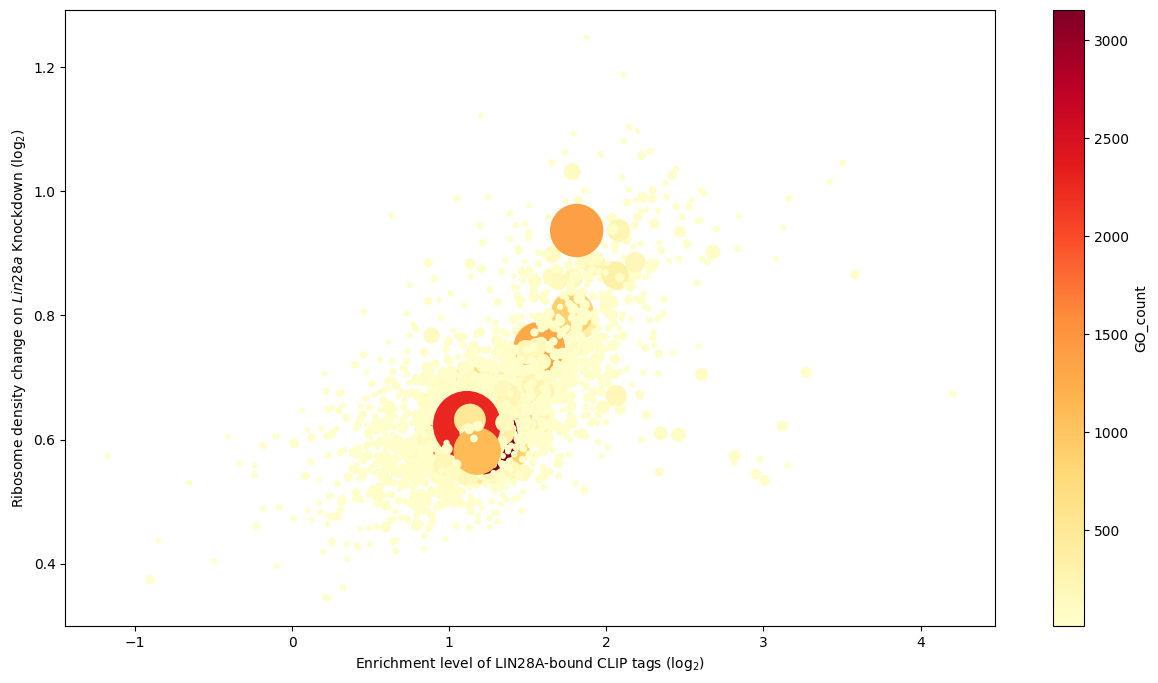

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# log2 변환
x = np.log2(GO_heatmap['clip_enrichment_mean'])
y = np.log2(GO_heatmap['rden_change_mean']+1)
sizes = GO_heatmap['GO_count']

# 그래프 그리기
plt.figure(figsize=(15,8))
plt.scatter(x, y, s=sizes, c=sizes, cmap='YlOrRd')
plt.xlabel("Enrichment level of LIN28A-bound CLIP tags (log$_{2}$)")
plt.ylabel("Ribosome density change on $\it{Lin28a}$ Knockdown (log$_{2}$)")

plt.colorbar(label='GO_count')
plt.show()

<ipython-input-51-97d670c39fb8>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels(['$10^{-20}$', '$10^{-15}$', '$10^{-10}$', '$10^{-5}$', '$10^{0}$'])  # 눈금에 대응하는 레이블 설정


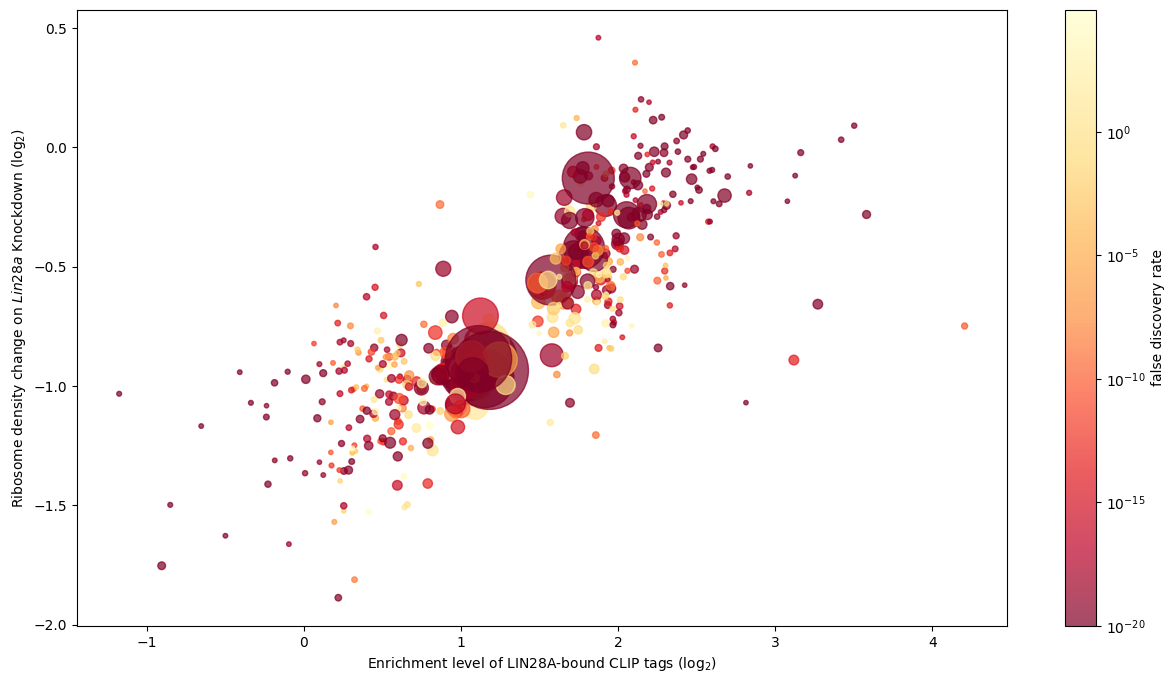

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# log2 변환
x = np.log2(GO_heatmap_filtered['clip_enrichment_mean'])
y = np.log2(GO_heatmap_filtered['rden_change_mean'])
size = GO_heatmap_filtered['GO_count']
color = GO_heatmap_filtered['clip_enrichment_fdr']

# 그래프 그리기
plt.figure(figsize=(15, 8))
scatter_plot = plt.scatter(x, y, s=size, c=color, cmap='YlOrRd_r', alpha=.7)
plt.xlabel("Enrichment level of LIN28A-bound CLIP tags (log$_{2}$)")
plt.ylabel("Ribosome density change on $\it{Lin28a}$ Knockdown (log$_{2}$)")

# Colorbar 설정
cbar = plt.colorbar(scatter_plot, label='false discovery rate')
cbar.set_ticklabels(['$10^{-20}$', '$10^{-15}$', '$10^{-10}$', '$10^{-5}$', '$10^{0}$'])  # 눈금에 대응하는 레이블 설정

plt.show()


ValueError: ignored

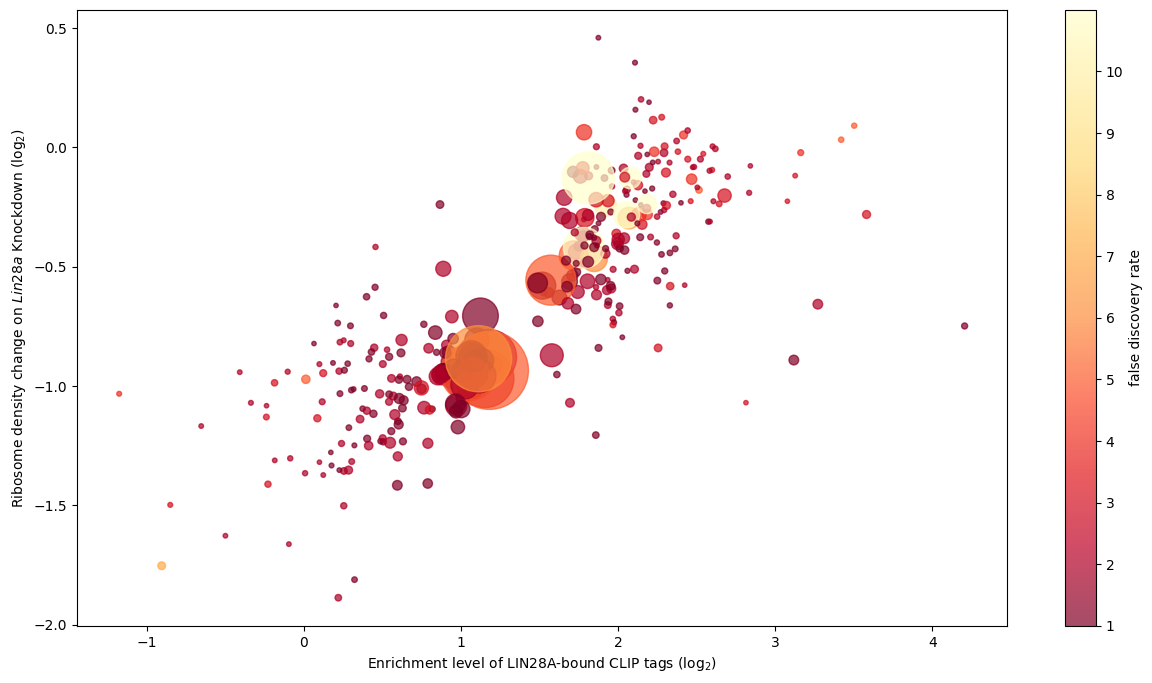

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# log2 변환
x = np.log2(GO_heatmap_filtered['clip_enrichment_mean'])
y = np.log2(GO_heatmap_filtered['rden_change_mean'])
size = GO_heatmap_filtered['GO_count']
color = GO_heatmap_filtered['clip_enrichment_fdr']

# 구간 설정
thresholds = [10**i for i in range(0, -21, -2)]
labels = [f'10^{i} to 10^{i-2}' for i in range(0, -21, -2)]

# 데이터를 구간에 할당
color_bins = np.digitize(color, thresholds)

# 그래프 그리기
plt.figure(figsize=(15, 8))
scatter_plot = plt.scatter(x, y, s=size, c=color_bins, cmap='YlOrRd_r', alpha=.7)
plt.xlabel("Enrichment level of LIN28A-bound CLIP tags (log$_{2}$)")
plt.ylabel("Ribosome density change on $\it{Lin28a}$ Knockdown (log$_{2}$)")

# Colorbar 설정
cbar = plt.colorbar(scatter_plot, ticks=range(1, len(thresholds)), label='false discovery rate')
cbar.set_ticklabels(labels)

plt.show()